In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# pour accéder aux fichiers
import os
# faire des opérations sur images
import cv2
# pour afficher images
import PIL

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# afficher predictions
from sklearn.metrics import classification_report

In [2]:
import pathlib
import zipfile
import tensorflow as tf

urls = ["https://github.com/cai-i/image_classification/raw/train_test/resized_images.zip"] 
for url in urls :
  data_dir = tf.keras.utils.get_file(origin=url, extract=False)

  with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall('/content/datasets')

56207202/56207202 [==============================] - 1s 0us/step


In [3]:
data_dir = pathlib.Path('/content/datasets/resized_images')
train_dir = pathlib.Path('/content/datasets/resized_images/train')
val_dir = pathlib.Path('/content/datasets/resized_images/val')
test_dir = pathlib.Path('/content/datasets/resized_images/test')

In [4]:
class_names = ['abeille', 'guepe', 'frelon']
class_names_label = { class_name:i for i, class_name in enumerate(class_names)}

print(class_names_label)

{'abeille': 0, 'guepe': 1, 'frelon': 2}


In [5]:
def load_data():

  dir = '/content/datasets/resized_images/'
  datasets = ['train', 'val', 'test']

  output = []

  for dataset in datasets:
    path = os.path.join(dir, dataset)
    images=[]
    labels=[]

    for category in os.listdir(path):
      label= class_names_label[category]
      cat_path = os.path.join(path, category)

      for img in os.listdir(cat_path):
        img_path = os.path.join(cat_path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        # append to lists
        images.append(image)
        labels.append(label)
    
    images = np.array(images, dtype='float32')
    labels = np.array(labels, dtype = 'int32')

    output.append((images, labels))

  return output

In [6]:
(train_imgs, train_labels), (val_imgs, val_labels), (test_imgs, test_labels) = load_data()

In [7]:
# nb de classes
nb_classes = 3

model = tf.keras.Sequential([
    # Convolution avec 16 neuronnes
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    # Pooling : réduit notre image pour avoir un jeu de donnée plus petit
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    # Flatten : construit un vecteur à partir de notre matrice
    layers.Flatten(),    
    layers.Dense(128, activation='relu'),
    # softmax pour avoir la probabilité entre nos différentes classes
    layers.Dense(nb_classes, activation=tf.nn.softmax)
])

In [8]:
model.compile(
    optimizer='adam',
    loss= 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history = model.fit(
    train_imgs,
    train_labels,
    batch_size= 32,
    epochs=20,
    validation_data= (val_imgs,val_labels))

Epoch 1/20
99/99 [==============================] - 15s 60ms/step - loss: 40.7147 - accuracy: 0.3784 - val_loss: 1.0704 - val_accuracy: 0.3644
Epoch 2/20
99/99 [==============================] - 5s 50ms/step - loss: 0.9613 - accuracy: 0.5152 - val_loss: 0.8940 - val_accuracy: 0.6252
Epoch 3/20
99/99 [==============================] - 5s 49ms/step - loss: 0.6267 - accuracy: 0.7473 - val_loss: 0.8894 - val_accuracy: 0.6489
Epoch 4/20
99/99 [==============================] - 5s 50ms/step - loss: 0.3557 - accuracy: 0.8717 - val_loss: 0.8276 - val_accuracy: 0.7007
Epoch 5/20
99/99 [==============================] - 5s 49ms/step - loss: 0.1629 - accuracy: 0.9460 - val_loss: 0.9859 - val_accuracy: 0.7170
Epoch 6/20
99/99 [==============================] - 5s 49ms/step - loss: 0.1140 - accuracy: 0.9740 - val_loss: 1.1456 - val_accuracy: 0.7141
Epoch 7/20
99/99 [==============================] - 5s 50ms/step - loss: 0.0630 - accuracy: 0.9841 - val_loss: 1.1589 - val_accuracy: 0.7156
Epoch 8/20


In [11]:
# pour voir intégralité de notre réseau de neuronnes
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 64)       0

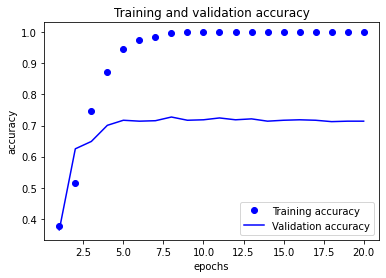

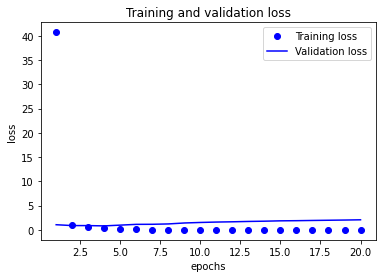

In [12]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [13]:
test_loss = model.evaluate(test_imgs, test_labels)

22/22 [==============================] - 1s 27ms/step - loss: 2.2878 - accuracy: 0.6815


In [14]:
predictions = model.predict(test_imgs)
pred_labels = np.argmax(predictions, axis=1)

print(classification_report(test_labels, pred_labels))

22/22 [==============================] - 1s 22ms/step
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       225
           1       0.64      0.66      0.65       225
           2       0.72      0.75      0.74       225

    accuracy                           0.68       675
   macro avg       0.68      0.68      0.68       675
weighted avg       0.68      0.68      0.68       675

